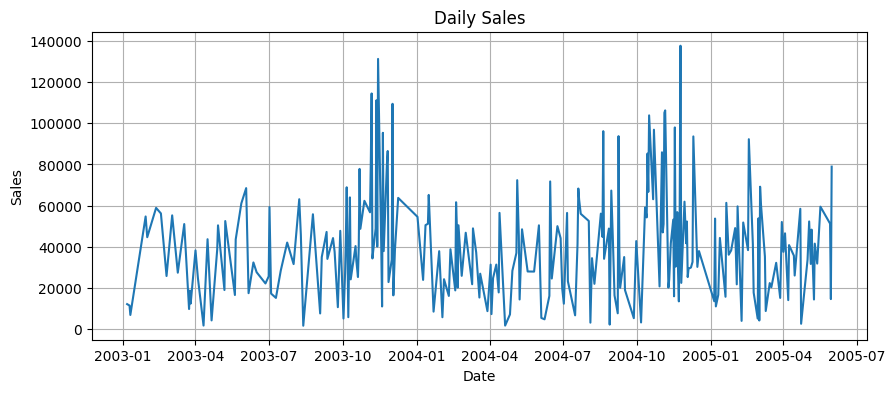

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyveqqbxo/f1olnvds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyveqqbxo/vwwf14k3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1170', 'data', 'file=/tmp/tmpyveqqbxo/f1olnvds.json', 'init=/tmp/tmpyveqqbxo/vwwf14k3.json', 'output', 'file=/tmp/tmpyveqqbxo/prophet_model2bqdz_34/prophet_model-20250531030550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


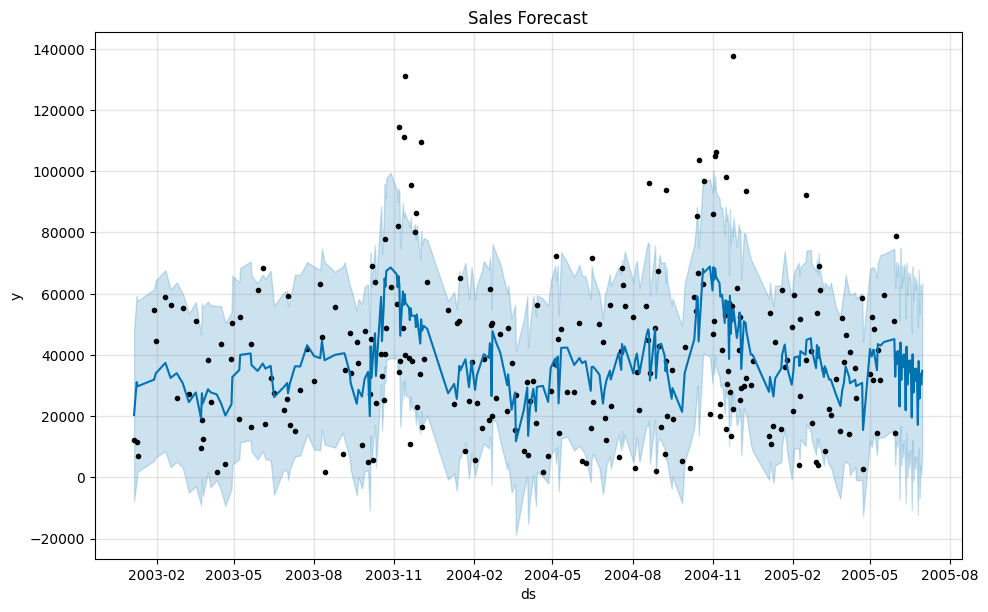

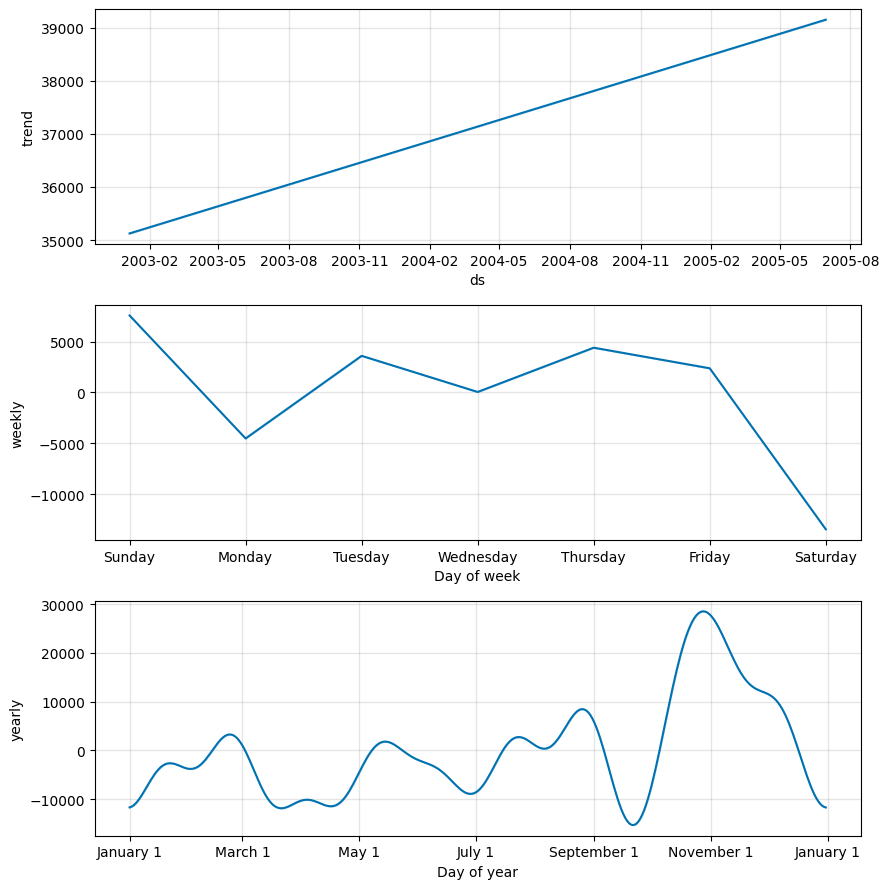

In [1]:
# Step 1: Install Prophet
!pip install prophet --quiet

# Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 3: Load Dataset with correct encoding
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

# Step 4: Select required columns and rename
df = df[['ORDERDATE', 'SALES']]
df = df.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})

# Step 5: Convert date column to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Step 6: Aggregate sales by date (some dates may have multiple orders)
df = df.groupby('ds').sum().reset_index()

# Step 7: Plot original sales
plt.figure(figsize=(10, 4))
plt.plot(df['ds'], df['y'])
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Step 8: Create and fit Prophet model
model = Prophet()
model.fit(df)

# Step 9: Make future dataframe and forecast
future = model.make_future_dataframe(periods=30)  # forecast next 30 days
forecast = model.predict(future)

# Step 10: Plot forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

# Step 11: Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()